Dataset Shape: (1460, 81)
Columns in Dataset: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 

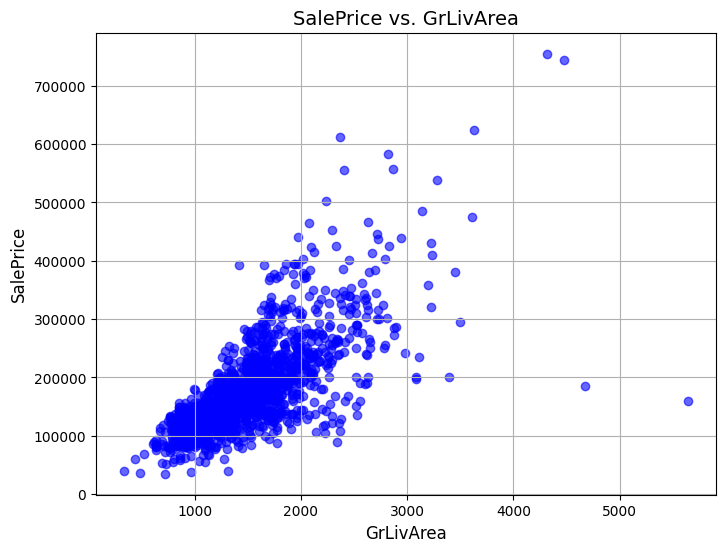


Feature: GrLivArea
Coefficient: 110.44522670784947
Intercept: 12777.748069876718
MAE: 38891.69129207035
MSE: 3735151247.724121
RMSE: 61115.883759658755


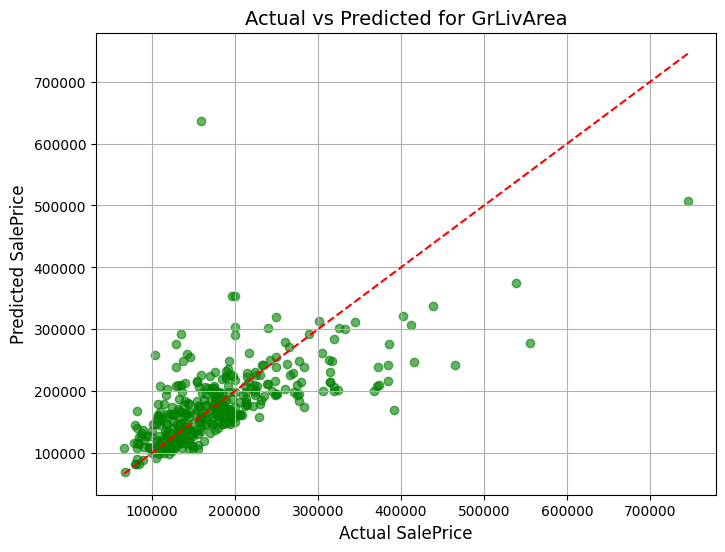


Feature: LotArea
Coefficient: 2.0386434968363996
Intercept: 159357.56214959617
MAE: 54329.143334725326
MSE: 6092380717.752634
RMSE: 78053.70406170763


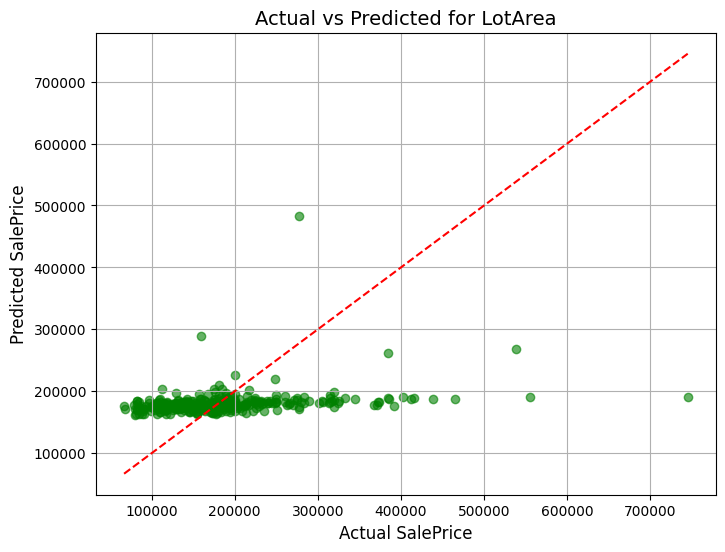


Feature: TotalBsmtSF
Coefficient: 120.8530454358113
Intercept: 53228.47781933303
MAE: 45435.85140337086
MSE: 4571117524.444952
RMSE: 67610.04011568808


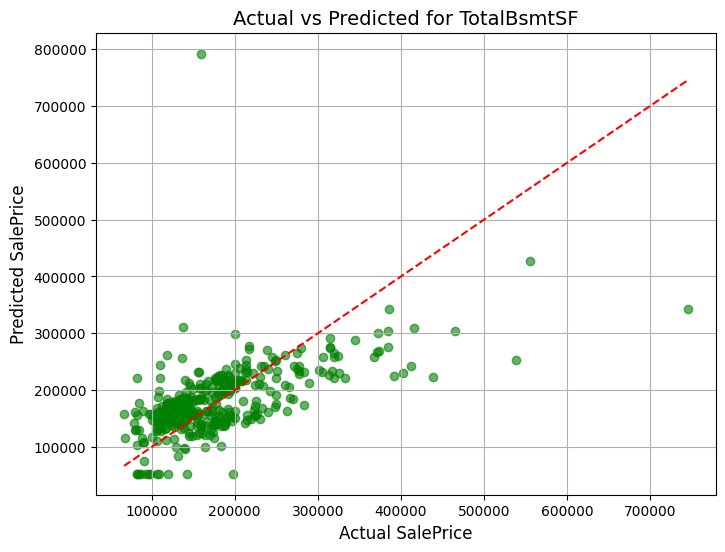


Feature: GarageArea
Coefficient: 240.8784416938627
Intercept: 67115.89547842869
MAE: 45148.282259529056
MSE: 4551199492.551796
RMSE: 67462.57846059396


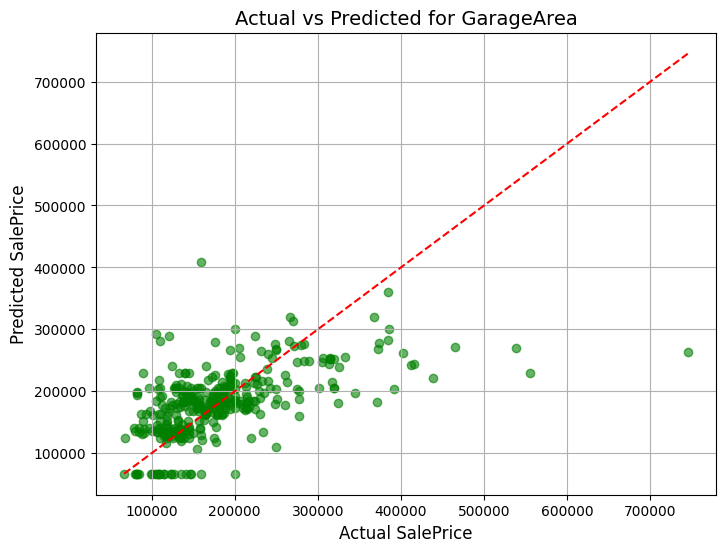


Performance Comparison Across Features:
GrLivArea: MAE=38891.69, MSE=3735151247.72, RMSE=61115.88
LotArea: MAE=54329.14, MSE=6092380717.75, RMSE=78053.70
TotalBsmtSF: MAE=45435.85, MSE=4571117524.44, RMSE=67610.04
GarageArea: MAE=45148.28, MSE=4551199492.55, RMSE=67462.58

Combined Model Coefficients:
GrLivArea: 70.53
LotArea: 0.32
TotalBsmtSF: 57.92
GarageArea: 101.05
Intercept: -38710.62405471274

Combined Model Performance:
MAE: 30150.824939966213
MSE: 3232954998.0876994
RMSE: 56859.08017271911

Feature Importance (Combined Model):
GrLivArea: 70.53
LotArea: 0.32
TotalBsmtSF: 57.92
GarageArea: 101.05


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Task 1: Load and explore the dataset
file_path = r"C:\Users\S4 User\Required Assignment 18.1 Regression with scikit-learn [Rohit Sharma]\train.csv"  # Update this path as needed
housing_data = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Shape:", housing_data.shape)
print("Columns in Dataset:", housing_data.columns)
print("Data Types:\n", housing_data.dtypes)
print("First 4 Rows of Data:\n", housing_data.head(4))

# Define target variable and feature variables
target = "SalePrice"
features = ["GrLivArea", "LotArea", "TotalBsmtSF", "GarageArea"]

# Task 2: Visualize SalePrice against GrLivArea to observe linearity
plt.figure(figsize=(8, 6))
plt.scatter(housing_data["GrLivArea"], housing_data["SalePrice"], alpha=0.6, color='blue')
plt.title("SalePrice vs. GrLivArea", fontsize=14)
plt.xlabel("GrLivArea", fontsize=12)
plt.ylabel("SalePrice", fontsize=12)
plt.grid()
plt.show()

# Function to train, evaluate, and visualize a model for a single feature
def train_and_evaluate(feature):
    """
    Train and evaluate a Linear Regression model for a given feature.

    Args:
        feature (str): Feature column name.

    Returns:
        tuple: MAE, MSE, RMSE of the model on test data.
    """
    # Task 3: Partition the dataset
    X = housing_data[[feature]].values  # Extract feature as X
    y = housing_data[target].values    # Extract target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1100, random_state=0)
    
    # Task 4: Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    print(f"\nFeature: {feature}")
    print("Coefficient:", model.coef_[0])
    print("Intercept:", model.intercept_)
    
    # Task 5: Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    
    # Visualization of predictions vs actual values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='green')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
    plt.title(f"Actual vs Predicted for {feature}", fontsize=14)
    plt.xlabel("Actual SalePrice", fontsize=12)
    plt.ylabel("Predicted SalePrice", fontsize=12)
    plt.grid()
    plt.show()
    
    return mae, mse, rmse

# Task 6: Train and evaluate models for individual features
results = {}
for feature in features:
    results[feature] = train_and_evaluate(feature)

# Compare performance of individual models
print("\nPerformance Comparison Across Features:")
for feature, (mae, mse, rmse) in results.items():
    print(f"{feature}: MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}")

# Task 7: Train a combined model using all four features
X = housing_data[features].values
y = housing_data[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1100, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
print("\nCombined Model Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")
print("Intercept:", model.intercept_)

# Predict and evaluate combined model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("\nCombined Model Performance:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

# Task 8: Feature importance (interpreting coefficients)
print("\nFeature Importance (Combined Model):")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")
